# **MINIPROJECT NOTEBOOK**

## Data Collection

1. we sourced the data from kaggle the data contained congestion , traffic direction, and X y location

2. we used only the congestion to train the model we used LSTM , GRU and RNN to see which is best

## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

## Functions for later to plot predictions and calculate RMSE

In [ ]:
def plot_pred(test, pred):
    plt.plot(test, color='red', label='Real Congestion')
    plt.plot(pred, color='blue', label='Predicted Congestion')
    plt.title('car Congestion')
    plt.xlabel('Time')
    plt.ylabel('car Congetion')
    plt.legend()
    plt.show()

def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test, pred))
    print("The root mean squared error is {}.".format(rmse))

## Loading and preprocessing the data

In [ ]:
df = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_5\\Week 5 Mini Project\\Datasets\Train.csv')
df

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


## What are the datatypes ?

In [ ]:
df.dtypes

row_id         int64
time          object
x              int64
y              int64
direction     object
congestion     int64
dtype: object

In [ ]:
df.shape

(848835, 6)

## Convert 'time' column from [Object-format] into [Datetime-format]

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df.dtypes

row_id                 int64
time          datetime64[ns]
x                      int64
y                      int64
direction             object
congestion             int64
dtype: object

## Isolate and store the (hour / day / month / date) of the month from the 'time' column into separate columns

In [ ]:
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month
df['date'] = df['time'].dt.date
df

,row_id,time,x,y,direction,congestion,day,hour,month,date
0,0,1991-04-01 00:00:00,0,0,EB,70,1,0,4,1991-04-01
1,1,1991-04-01 00:00:00,0,0,NB,49,1,0,4,1991-04-01
2,2,1991-04-01 00:00:00,0,0,SB,24,1,0,4,1991-04-01
3,3,1991-04-01 00:00:00,0,1,EB,18,1,0,4,1991-04-01
4,4,1991-04-01 00:00:00,0,1,NB,60,1,0,4,1991-04-01
...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54,30,11,9,1991-09-30
848831,848831,1991-09-30 11:40:00,2,3,NE,28,30,11,9,1991-09-30
848832,848832,1991-09-30 11:40:00,2,3,SB,68,30,11,9,1991-09-30
848833,848833,1991-09-30 11:40:00,2,3,SW,17,30,11,9,1991-09-30


## Drop row-id

In [ ]:
df.drop('row_id', axis=1, inplace=True)
df

,time,x,y,direction,congestion,day,hour,month,date
0,1991-04-01 00:00:00,0,0,EB,70,1,0,4,1991-04-01
1,1991-04-01 00:00:00,0,0,NB,49,1,0,4,1991-04-01
2,1991-04-01 00:00:00,0,0,SB,24,1,0,4,1991-04-01
3,1991-04-01 00:00:00,0,1,EB,18,1,0,4,1991-04-01
4,1991-04-01 00:00:00,0,1,NB,60,1,0,4,1991-04-01
...,...,...,...,...,...,...,...,...,...
848830,1991-09-30 11:40:00,2,3,NB,54,30,11,9,1991-09-30
848831,1991-09-30 11:40:00,2,3,NE,28,30,11,9,1991-09-30
848832,1991-09-30 11:40:00,2,3,SB,68,30,11,9,1991-09-30
848833,1991-09-30 11:40:00,2,3,SW,17,30,11,9,1991-09-30


## Aggregating congestion size, based on direcation

In [ ]:
group_dic = df.groupby(['direction']).agg({'congestion': 'mean'})
group_dic

,congestion
direction,
EB,49.571171
NB,51.853913
NE,39.971251
NW,27.188912
SB,53.716332
SE,34.859637
SW,42.019538
WB,49.842289


***Looks like we'll go with southbound driection***




## Selcting SB (southbound driection) only from the column direction

In [ ]:
df = df[df['direction'] == 'SB']
df

,time,x,y,direction,congestion,day,hour,month,date
2,1991-04-01 00:00:00,0,0,SB,24,1,0,4,1991-04-01
5,1991-04-01 00:00:00,0,1,SB,58,1,0,4,1991-04-01
9,1991-04-01 00:00:00,0,2,SB,46,1,0,4,1991-04-01
14,1991-04-01 00:00:00,0,3,SB,49,1,0,4,1991-04-01
20,1991-04-01 00:00:00,1,0,SB,44,1,0,4,1991-04-01
...,...,...,...,...,...,...,...,...,...
848806,1991-09-30 11:40:00,1,3,SB,66,30,11,9,1991-09-30
848811,1991-09-30 11:40:00,2,0,SB,45,30,11,9,1991-09-30
848817,1991-09-30 11:40:00,2,1,SB,37,30,11,9,1991-09-30
848825,1991-09-30 11:40:00,2,2,SB,64,30,11,9,1991-09-30


## Drop Columns: (x) and (y) and (directions)

In [ ]:
df.drop(['x','y','direction'],axis=1, inplace=True)
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_20136\716129739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['x','y','direction'],axis=1, inplace=True)


,time,congestion,day,hour,month,date
2,1991-04-01 00:00:00,24,1,0,4,1991-04-01
5,1991-04-01 00:00:00,58,1,0,4,1991-04-01
9,1991-04-01 00:00:00,46,1,0,4,1991-04-01
14,1991-04-01 00:00:00,49,1,0,4,1991-04-01
20,1991-04-01 00:00:00,44,1,0,4,1991-04-01
...,...,...,...,...,...,...
848806,1991-09-30 11:40:00,66,30,11,9,1991-09-30
848811,1991-09-30 11:40:00,45,30,11,9,1991-09-30
848817,1991-09-30 11:40:00,37,30,11,9,1991-09-30
848825,1991-09-30 11:40:00,64,30,11,9,1991-09-30


## Filtering data between April 1, 1991, and September 30, 1991

In [ ]:
import datetime as dt
start=dt.datetime(1991,4,1)
end=dt.datetime(1991,9,30)

date_filtered_data = df[(df['time'] > start) & (df['time'] < end)]

## Updating the original DataFrame (df) with the filtered data.

In [ ]:
df = date_filtered_data

## Drop (time) Column

In [ ]:
df.drop('time', axis=1, inplace=True)
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_20136\733807331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('time', axis=1, inplace=True)


,congestion,day,hour,month,date
67,24,1,0,4,1991-04-01
70,55,1,0,4,1991-04-01
74,46,1,0,4,1991-04-01
79,52,1,0,4,1991-04-01
85,43,1,0,4,1991-04-01
...,...,...,...,...,...
846466,50,29,23,9,1991-09-29
846471,31,29,23,9,1991-09-29
846477,18,29,23,9,1991-09-29
846485,58,29,23,9,1991-09-29


## Drop Columns: (month) and (day)

In [ ]:
df.drop(['month', 'day'], axis=1, inplace=True)
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_20136\1078794391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['month', 'day'], axis=1, inplace=True)


,congestion,hour,date
67,24,0,1991-04-01
70,55,0,1991-04-01
74,46,0,1991-04-01
79,52,0,1991-04-01
85,43,0,1991-04-01
...,...,...,...
846466,50,23,1991-09-29
846471,31,23,1991-09-29
846477,18,23,1991-09-29
846485,58,23,1991-09-29


## Group the data by the hour in each day to each month

In [ ]:
n_df = df.groupby(['date', 'hour']).sum().reset_index()

# Display the result
n_df

,date,hour,congestion
0,1991-04-01,0,1064
1,1991-04-01,1,1755
2,1991-04-01,2,2007
3,1991-04-01,3,1471
4,1991-04-01,4,1498
...,...,...,...
4349,1991-09-29,19,2144
4350,1991-09-29,20,2015
4351,1991-09-29,21,1921
4352,1991-09-29,22,1784


## just wanted to see what is the output before changing it

In [ ]:
df = n_df

## Take the length of the dataframe and split by 80%

In [ ]:
train_size = int(len(df) * 0.8)
train_size

3483

## Split the data to train and test

In [ ]:
train = df[:train_size].iloc[:,2:3].values
test = df[train_size:].iloc[:,2:3].values

train.shape, test.shape, train

((3483, 1),
 (871, 1),
 array([[1064],
        [1755],
        [2007],
        ...,
        [1597],
        [1882],
        [1568]], dtype=int64))

## Visualizing time series and show train and testing data

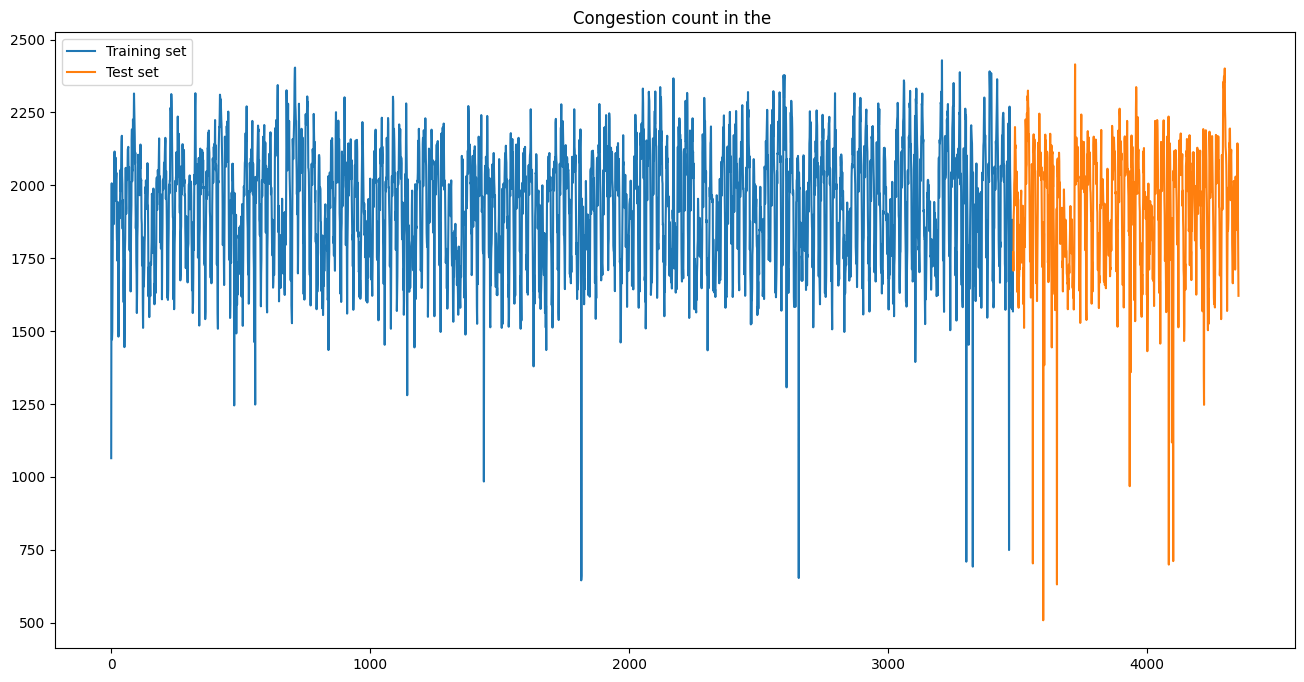

In [ ]:
df['congestion'][:train_size].plot(figsize=(16,8), legend=True)
df['congestion'][train_size:].plot(figsize=(16,8), legend=True)
plt.legend(['Training set', 'Test set'])
plt.title('Congestion count in the ')
plt.show()

In [ ]:
df.dtypes

date          object
hour           int32
congestion     int64
dtype: object

## Scale training data

In [ ]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

In [ ]:
len(train_scaled)

3483

## Split the training data into X and y

In [ ]:
X_train = []
y_train = []
for i in range(7,len(train_scaled)):
    X_train.append(train_scaled[i-7:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping tha data

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## **LSTM MODEL**

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1),
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## Train model



In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2089
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0155
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0152
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0132
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0138
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0136
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0121
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0111
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0115
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0116
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0115
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0108
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0102
Epoch 16/50
55/5

## Make predictions with LSTM model

In [ ]:
dataset_total = pd.concat((df["congestion"][:train_size], df["congestion"][train_size:]), axis=0)
inputs = dataset_total[len(dataset_total)-len(test)-7:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [ ]:
len(test)

871

## Predict testing data

In [ ]:
X_test = []
for i in range(7,878):
    X_test.append(inputs[i-7:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_cong = model.predict(X_test)
pred_cong = scaler.inverse_transform(pred_cong)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


## Plotting real vs predicted data

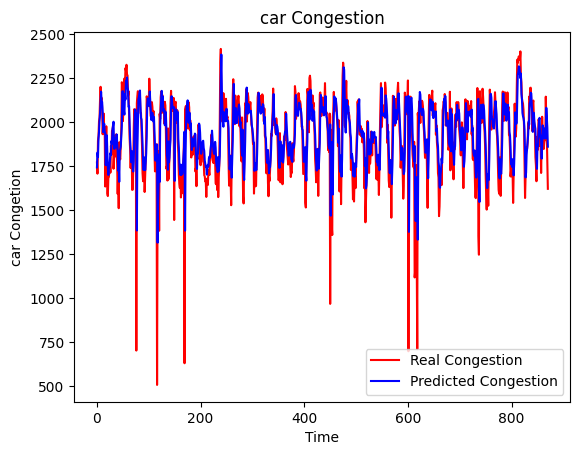

In [ ]:
plot_pred(test, pred_cong)

## ROOT MEAN SQUARED ERROR

In [ ]:
return_rmse(test, pred_cong)

The root mean squared error is 172.66750505075078.


## **GRU MODEL**

In [ ]:
RGRU = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.5),
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.5),
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.5),
    GRU(50, activation='tanh'),
    Dropout(0.5),
    Dense(1)
])

RGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

RGRU.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 7, 50)          │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 7, 50)          │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_10 (GRU)                    │ (None, 7, 50)          │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model


In [ ]:
RGRU.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.1488
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0178
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0161
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0144
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0134
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0135
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0137
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0126
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0126
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0127
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0127
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0127
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0119
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0119
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0120
Epoc

## Make predictions with GRU model

In [ ]:
X_test = []
for i in range(7,878):
    X_test.append(inputs[i-7:i,0])
X_test = np.array(X_test)


## Check the data

In [ ]:
X_test

array([[0.54596413, 0.52298206, 0.55381166, ..., 0.53363229, 0.69338565,
        0.51737668],
       [0.52298206, 0.55381166, 0.52130045, ..., 0.69338565, 0.51737668,
        0.63060538],
       [0.55381166, 0.52130045, 0.53363229, ..., 0.51737668, 0.63060538,
        0.59529148],
       ...,
       [0.72533632, 0.67376682, 0.69394619, ..., 0.70235426, 0.84024664,
        0.76793722],
       [0.67376682, 0.69394619, 0.70347534, ..., 0.84024664, 0.76793722,
        0.71524664],
       [0.69394619, 0.70347534, 0.70235426, ..., 0.76793722, 0.71524664,
        0.63845291]])

## To Reshape

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test

array([[[0.54596413],
        [0.52298206],
        [0.55381166],
        ...,
        [0.53363229],
        [0.69338565],
        [0.51737668]],

       [[0.52298206],
        [0.55381166],
        [0.52130045],
        ...,
        [0.69338565],
        [0.51737668],
        [0.63060538]],

       [[0.55381166],
        [0.52130045],
        [0.53363229],
        ...,
        [0.51737668],
        [0.63060538],
        [0.59529148]],

       ...,

       [[0.72533632],
        [0.67376682],
        [0.69394619],
        ...,
        [0.70235426],
        [0.84024664],
        [0.76793722]],

       [[0.67376682],
        [0.69394619],
        [0.70347534],
        ...,
        [0.84024664],
        [0.76793722],
        [0.71524664]],

       [[0.69394619],
        [0.70347534],
        [0.70235426],
        ...,
        [0.76793722],
        [0.71524664],
        [0.63845291]]])

## Make predictions with a trained model

In [ ]:
GRU_predicted_congestion = RGRU.predict(X_test)
GRU_predicted_congestion

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.6484581 ],
       [0.6543654 ],
       [0.6597683 ],
       [0.6686496 ],
       [0.6820483 ],
       [0.69831204],
       [0.7128537 ],
       [0.732676  ],
       [0.7512306 ],
       [0.7673132 ],
       [0.7769356 ],
       [0.7812449 ],
       [0.776364  ],
       [0.7678945 ],
       [0.76049674],
       [0.75291055],
       [0.74639773],
       [0.73099077],
       [0.7161386 ],
       [0.71109706],
       [0.7067087 ],
       [0.6954724 ],
       [0.6802235 ],
       [0.6669738 ],
       [0.66127694],
       [0.65783495],
       [0.65802   ],
       [0.661708  ],
       [0.67055607],
       [0.6796201 ],
       [0.6901894 ],
       [0.70229554],
       [0.71416414],
       [0.7168034 ],
       [0.7137033 ],
       [0.7105388 ],
       [0.7093395 ],
       [0.7058671 ],
       [0.70580125],
       [0.70543313],
       [0.7043713 ],
       [0.69423443],
       [0.68202496],
       [0.66737485],
       [0.6628636 ],
       [0.66461575],
       [0.67065847],
       [0.679

## Reverse the scaling that was applied to the data before it was fed into the model

In [ ]:
GRU_predicted_congestion = scaler.inverse_transform(GRU_predicted_congestion)
GRU_predicted_congestion

array([[1801.8494],
       [1812.388 ],
       [1822.0266],
       [1837.8708],
       [1861.7743],
       [1890.7887],
       [1916.731 ],
       [1952.0941],
       [1985.1954],
       [2013.8867],
       [2031.0531],
       [2038.7408],
       [2030.0333],
       [2014.9238],
       [2001.7262],
       [1988.1924],
       [1976.5736],
       [1949.0875],
       [1922.5913],
       [1913.597 ],
       [1905.7683],
       [1885.7228],
       [1858.5187],
       [1834.8813],
       [1824.7181],
       [1818.5775],
       [1818.9077],
       [1825.487 ],
       [1841.2721],
       [1857.4421],
       [1876.2979],
       [1897.8953],
       [1919.0688],
       [1923.7771],
       [1918.2467],
       [1912.6012],
       [1910.4617],
       [1904.2668],
       [1904.1495],
       [1903.4928],
       [1901.5983],
       [1883.5142],
       [1861.7325],
       [1835.5968],
       [1827.5487],
       [1830.6746],
       [1841.4547],
       [1857.9266],
       [1882.6072],
       [1919.7462],


## Plot real vs predeicted data

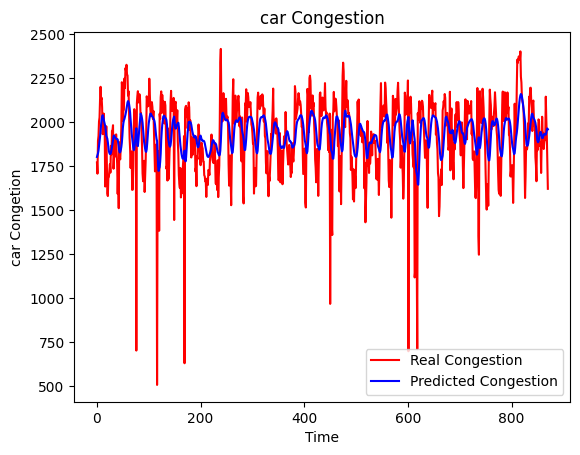

In [ ]:
plot_pred(test, GRU_predicted_congestion)

## ROOT MEAN SQUARED ERROR

In [ ]:
return_rmse(test, GRU_predicted_congestion)

The root mean squared error is 202.31987375086067.


## **RNN MODEL**

In [ ]:
df = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_5\\Week 5 Mini Project\\Datasets\Train.csv')
df

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


## Convert 'time' column from [Object-format] into [Datetime-format]

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df.dtypes

row_id                 int64
time          datetime64[ns]
x                      int64
y                      int64
direction             object
congestion             int64
dtype: object

## Isolate and store the (hour and date) of the month from the 'time' column into separate columns

In [ ]:
df['hour'] = df['time'].dt.hour
df['date'] = df['time'].dt.date
df

## Selcting SB (southbound driection) only from the column direction

In [ ]:
df = df[df['direction'] == 'SB']
df

,row_id,time,x,y,direction,congestion,hour,date
2,2,1991-04-01 00:00:00,0,0,SB,24,0,1991-04-01
5,5,1991-04-01 00:00:00,0,1,SB,58,0,1991-04-01
9,9,1991-04-01 00:00:00,0,2,SB,46,0,1991-04-01
14,14,1991-04-01 00:00:00,0,3,SB,49,0,1991-04-01
20,20,1991-04-01 00:00:00,1,0,SB,44,0,1991-04-01
...,...,...,...,...,...,...,...,...
848806,848806,1991-09-30 11:40:00,1,3,SB,66,11,1991-09-30
848811,848811,1991-09-30 11:40:00,2,0,SB,45,11,1991-09-30
848817,848817,1991-09-30 11:40:00,2,1,SB,37,11,1991-09-30
848825,848825,1991-09-30 11:40:00,2,2,SB,64,11,1991-09-30


## Drop some Columns

In [ ]:
df.drop(['x','y','direction', 'row_id', 'time'],axis=1, inplace=True)
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_20136\3250639382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['x','y','direction', 'row_id', 'time'],axis=1, inplace=True)


,congestion,hour,date
2,24,0,1991-04-01
5,58,0,1991-04-01
9,46,0,1991-04-01
14,49,0,1991-04-01
20,44,0,1991-04-01
...,...,...,...
848806,66,11,1991-09-30
848811,45,11,1991-09-30
848817,37,11,1991-09-30
848825,64,11,1991-09-30


## Group the data by the hour in each day to each month

In [ ]:
df = df.groupby(['date', 'hour']).sum().reset_index()

# Display the result
df

,date,hour,congestion
0,1991-04-01,0,1544
1,1991-04-01,1,1755
2,1991-04-01,2,2007
3,1991-04-01,3,1471
4,1991-04-01,4,1498
...,...,...,...
4361,1991-09-30,7,2003
4362,1991-09-30,8,1975
4363,1991-09-30,9,1909
4364,1991-09-30,10,1930


## Visualizing Congestion Trends Over Time (Heading Southbound)

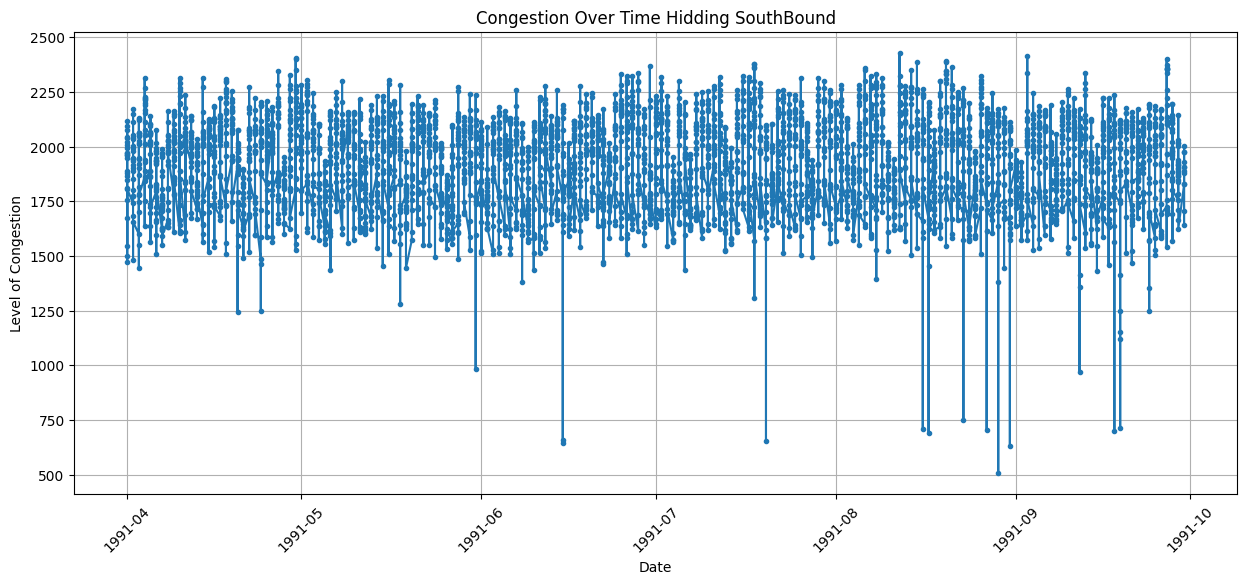

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df['date'], df['congestion'], marker='.')
plt.title('Congestion Over Time Heading SouthBound')
plt.xlabel('Date')
plt.ylabel('Level of Congestion')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Visualizing Congestion levels along with a 30-day moving average

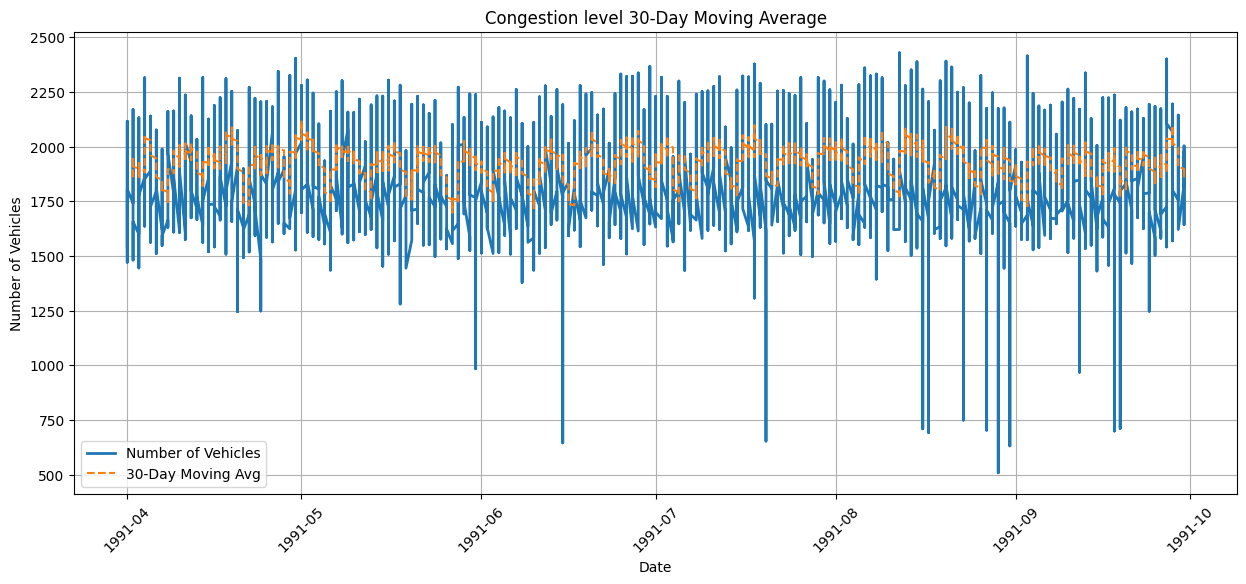

In [ ]:
window = 30
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['congestion'], label='Number of Vehicles', linewidth=2)
plt.plot(df['date'], df['congestion'].rolling(window=window).mean(), label=f'{window}-Day Moving Avg', linestyle='--')
plt.title(f'Congestion level {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Visualizing Monthly Seasonality of Congestion Levels

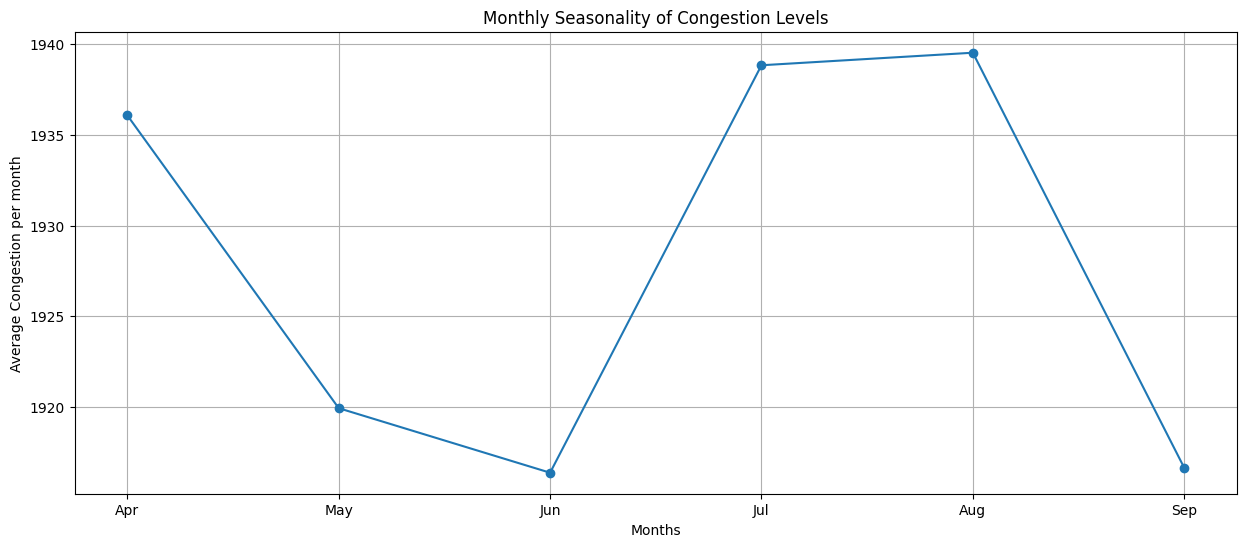

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month

monthly_average = df.groupby('Month')['congestion'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o')
plt.title('Monthly Seasonality of Congestion Levels')
plt.xlabel('Months')
plt.ylabel('Average Congestion per month')
plt.xticks(range(4, 10), ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.grid(True)
plt.show()

## Check the data

In [ ]:
df

,date,hour,congestion,Month
0,1991-04-01,0,1544,4
1,1991-04-01,1,1755,4
2,1991-04-01,2,2007,4
3,1991-04-01,3,1471,4
4,1991-04-01,4,1498,4
...,...,...,...,...
4361,1991-09-30,7,2003,9
4362,1991-09-30,8,1975,9
4363,1991-09-30,9,1909,9
4364,1991-09-30,10,1930,9


## Drop some columns

In [ ]:
df.drop(['date', 'hour', 'Month'], axis=1, inplace=True)
df

,congestion
0,1544
1,1755
2,2007
3,1471
4,1498
...,...
4361,2003
4362,1975
4363,1909
4364,1930


## Resetting the Index and Selecting the 'congestion' Column

In [ ]:
new_df = df.reset_index()['congestion']
new_df

0       1544
1       1755
2       2007
3       1471
4       1498
        ... 
4361    2003
4362    1975
4363    1909
4364    1930
4365    1974
Name: congestion, Length: 4366, dtype: int64

## Normalizing Congestion Values with MinMaxScaler for Model Input

In [ ]:
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1,1))

## Check the data

In [ ]:
scaled_data

array([[0.53930245],
       [0.64914107],
       [0.78032275],
       ...,
       [0.72930765],
       [0.74023946],
       [0.7631442 ]])

## "Calculating Training Data Size (80%) for Train-Test Split"

In [ ]:
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_size

3492

## Splitting the Scaled Data into Training and Testing Sets

In [ ]:
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

## Preparing sequences of data to be used as input (X) and output (y) for training and testing a Recurrent Neural Network (RNN)

In [ ]:
n_past = 7

# Prepare sequences for RNN
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

## Print the data

In [ ]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(3485, 7)
(3485,)


Testing set size:-
(867, 7)
(867,)


(None, None)

## Reshaping the Training and Testing Data for an RNN

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Constructing a Sequential RNN Model with Dropout Layers for Forecasting

In [ ]:
from keras.layers import SimpleRNN
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    SimpleRNN(50),
    Dropout(0.5),
    Dense(1)
])

model.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 7, 50)          │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

## Preparing the model for training by defining the loss function as Mean Squared Error and the optimizer as Adam

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

## Implementing Early Stopping and Model Checkpoints During Training

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5715 - val_loss: 0.0429
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1055 - val_loss: 0.0112
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0593 - val_loss: 0.0103
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0435 - val_loss: 0.0091
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0369 - val_loss: 0.0110
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0296 - val_loss: 0.0098
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0280 - val_loss: 0.0085
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0236 - val_loss: 0.0084
Epoch 9/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0214 - val_loss: 0.0088
Epoch 10/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0186 - val_loss: 0.0091
Epoch 11/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - val_loss: 0.0083
Epoch 12/100
109/109 ━━━━━━━━━━━━━━━━━━

## Making Predictions with the Trained Model

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## Converting Scaled Predictions Back to Original Data Scale for Interpretation and Comparison

In [ ]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## Calculating RMSE for Training and Test Data to Evaluate Model Performance

In [ ]:
return_rmse(y_train, train_predict)
# Calculate test data RMSE
return_rmse(y_test, test_predict)

The root mean squared error is 1922.4421757226287.
The root mean squared error is 1912.8544569421124.


## Visualizing Actual and Predicted Congestion Levels with Time Series Overlay

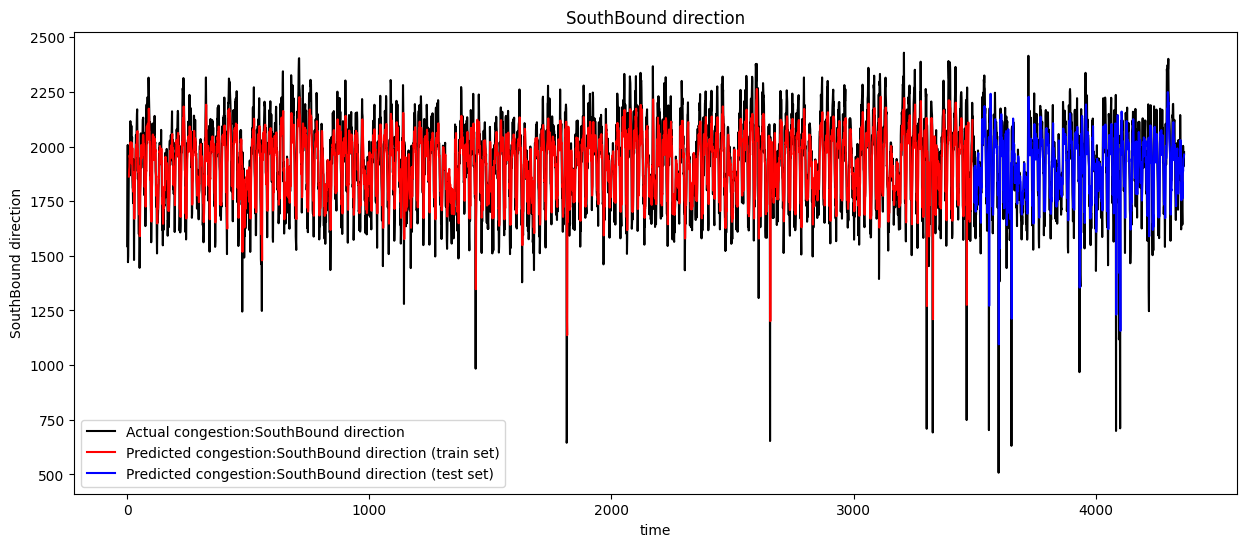

In [ ]:
direction_name = 'SouthBound'
look_back = 7

# Ensure the arrays are of type float
trainPredPlot = np.empty_like(new_df, dtype=float)
trainPredPlot[:] = np.nan

trainPredPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()

testPredictPlot = np.empty_like(new_df, dtype=float)
testPredictPlot[:] = np.nan

test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:] = test_predict.flatten()
original_scaled_data = scaler.inverse_transform(scaled_data)

plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual congestion:{direction_name} direction")
plt.plot(trainPredPlot, color='red', label=f"Predicted congestion:{direction_name} direction (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted congestion:{direction_name} direction (test set)")

plt.title(f"{direction_name} direction")
plt.xlabel("time")
plt.ylabel(f"{direction_name} direction")
plt.legend()
plt.show()


## Forecasting Next 10 Days of Congestion Based on Last Known Data

In [ ]:
# To predict for the next 10 days, you'll need the last n_past days of data
last_sequence = X_test[-1]

# Reshape the last_sequence to match the input shape of the model
last_sequence = last_sequence.reshape(1, n_past, 1) # Add an extra dimension for the features

# Generate predictions for the next 10 days
predictions_next_10_days = []
for _ in range(10):  # Predicting for the next 10 days
    next_day_prediction = model.predict(last_sequence)
    scalar_prediction = next_day_prediction[0, 0]  # Extract the scalar value
    predictions_next_10_days.append(scalar_prediction)  # Get the predicted value
    last_sequence = np.roll(last_sequence, -1, axis=1)  # Shift the sequence by one day
    last_sequence[0, -1, 0] = scalar_prediction  # Update the last element with the new prediction, including the feature dimension

# Transform the predictions back to the original scale
predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))

# Print the predictions for the next 10 days
print("Predictions for the next 10 days:")
for i, prediction in enumerate(predictions_next_10_days, start=1):
    print(f"Day {i}: Predicted Count = {prediction[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predictions for the next 10 days:
Day 1: Predicted Count = 1963.16455078125
Day 2: Predicted Count = 1948.2591552734375
Day 3: Predicted Count = 1929.9937744140625
Day 4: Predicted Count = 1908.3787841796875
Day 5: Predicted Count = 1904.1607666015625
Day 6: Predicted Count = 1907.614013671875
Day 7: Predicted Count = 1902.1566162109375
Day 8: Predicted Count = 1893.036865234375
Day 9: Predicted Count = 1889.38330078125
Day 10: Predicted Count = 1889.9921875


## Visualizing 10-Day Predicted Congestion Forecast with Markers and Grid

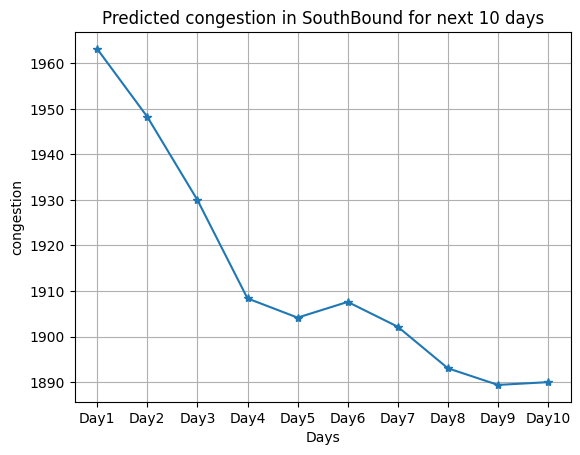

In [ ]:
plt.plot(predictions_next_10_days, marker='*')
plt.title(f'Predicted congestion in {direction_name} for next 10 days')
plt.xlabel('Days')
plt.ylabel('congestion')
plt.xticks(range(0, 10), ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10'])
plt.grid(True)
plt.show()